## Breast Cancer Classification (malingnant or benign)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load dataset
data = load_breast_cancer()
X = data.data        # shape: (569, 30)
y = data.target.reshape(-1, 1)

In [3]:
data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# Step 2: Normalize features (very important!)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:

# Step 3: Shuffle and split (60% train, 20% val, 20% test)
np.random.seed(42)
n_samples = X.shape[0]
indices = np.arange(n_samples)
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_end = int(0.6 * n_samples)
val_end = int(0.8 * n_samples)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

In [6]:
# Step 4: Initialize
n_features = X_train.shape[1]
w = np.random.randn(n_features, 1)
b = 0.0
learning_rate = 0.1
n_iterations = 1000
m = X_train.shape[0]

train_loss_history = []
val_loss_history = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
# Step 5: Training loop with validation
for i in range(n_iterations):
    z = X_train @ w + b
    y_pred = sigmoid(z)
    loss = -(1/m) * np.sum(y_train * np.log(y_pred + 1e-8) + (1 - y_train) * np.log(1 - y_pred + 1e-8))
    train_loss_history.append(loss)

    dz = y_pred - y_train
    dw = (1/m) * X_train.T @ dz
    db = (1/m) * np.sum(dz)

    w -= learning_rate * dw
    b -= learning_rate * db

    # Validation loss
    y_val_pred = sigmoid(X_val @ w + b)
    val_loss = -(1/len(y_val)) * np.sum(y_val * np.log(y_val_pred + 1e-8) + (1 - y_val) * np.log(1 - y_val_pred + 1e-8))
    val_loss_history.append(val_loss)

    if i % 100 == 0:
        print(f"Iter {i}: Train Loss = {loss:.4f} | Val Loss = {val_loss:.4f}")


Iter 0: Train Loss = 3.1710 | Val Loss = 2.4513
Iter 100: Train Loss = 0.1473 | Val Loss = 0.1251
Iter 200: Train Loss = 0.1066 | Val Loss = 0.0872
Iter 300: Train Loss = 0.0901 | Val Loss = 0.0724
Iter 400: Train Loss = 0.0804 | Val Loss = 0.0641
Iter 500: Train Loss = 0.0739 | Val Loss = 0.0587
Iter 600: Train Loss = 0.0693 | Val Loss = 0.0551
Iter 700: Train Loss = 0.0659 | Val Loss = 0.0528
Iter 800: Train Loss = 0.0632 | Val Loss = 0.0514
Iter 900: Train Loss = 0.0610 | Val Loss = 0.0509


In [8]:
# Step 6: Final test evaluation
def predict(X, w, b, threshold=0.5):
    return (sigmoid(X @ w + b) > threshold).astype(int)

y_test_pred = predict(X_test, w, b)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")


Final Test Accuracy: 93.86%


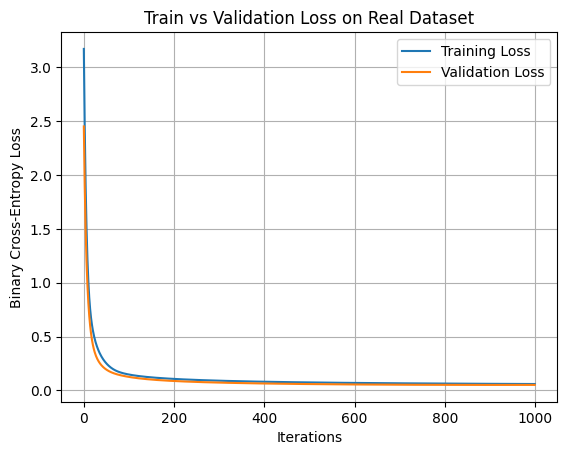

In [9]:
# Step 7: Loss plot
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Train vs Validation Loss on Real Dataset")
plt.legend()
plt.grid(True)
plt.show()

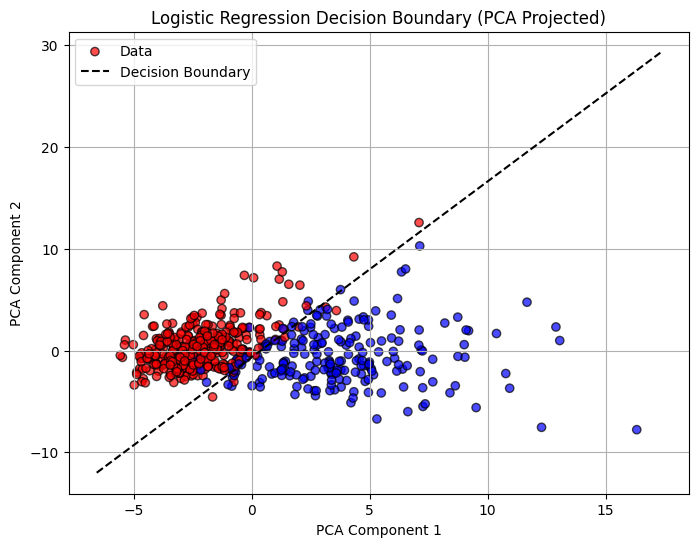

In [10]:
from sklearn.decomposition import PCA

# Step 8: Visualize decision boundary using PCA-reduced 2D features
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Project weights into the same 2D PCA space
W_pca = pca.components_ @ w  # shape (2, 1)

# Compute decision boundary line: W_pca[0]*x + W_pca[1]*y + b = 0
x_vals = np.linspace(X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1, 200)
y_vals = -(W_pca[0] * x_vals + b) / (W_pca[1] + 1e-8)

# Plot the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y.flatten(), cmap='bwr', edgecolor='k', alpha=0.7, label='Data')
plt.plot(x_vals, y_vals.flatten(), 'k--', label='Decision Boundary')
plt.title("Logistic Regression Decision Boundary (PCA Projected)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
